In [1]:
##Import useful modules

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

In [11]:
#Import dataset and look at first few entries

dataset = pd.read_csv('PressureSensorData.csv')
dataset.head()

,test_id,pt_psia,pa_psia,pd_volts
0,1.0,5,4,0.2834
1,1.0,10,10,0.3655
2,1.0,15,14,0.4469
3,1.0,35,34,0.7752
4,1.0,55,56,1.1028


In [3]:
##Create numpy arrays from the columns of our dataset

transPressure = np.array(dataset['pt_psia'])
anaPressure = np.array(dataset['pa_psia'])
voltage = np.array(dataset['pd_volts'])

In [4]:
dataset.cov()

,test_id,pt_psia,pa_psia,pd_volts
test_id,6.782931,0.797038,0.128020,0.014653
pt_psia,0.797038,3415.478972,3402.745327,55.991599
pa_psia,0.128020,3402.745327,3391.423589,55.783689
pd_volts,0.014653,55.991599,55.783689,0.917949


In [5]:
##Look at the correlation of our different columns

dataset.corr(method ='pearson') 

,test_id,pt_psia,pa_psia,pd_volts
test_id,1.000000,0.005257,0.000847,0.005896
pt_psia,0.005257,1.000000,0.999799,0.999972
pa_psia,0.000847,0.999799,1.000000,0.999786
pd_volts,0.005896,0.999972,0.999786,1.000000


Intercept   -12.354751
pd_volts     60.996438
dtype: float64


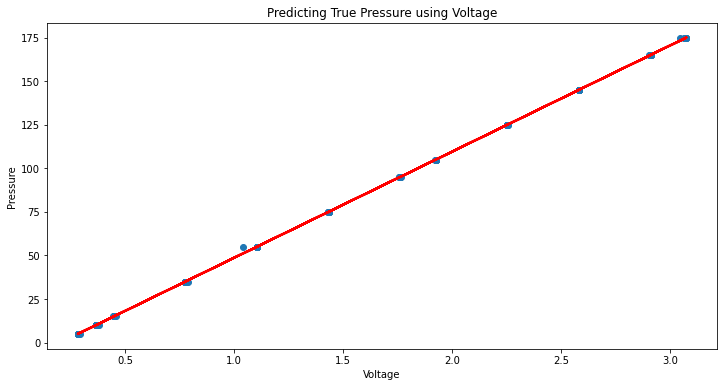

In [7]:
##Create and print model of true pressure as a function of voltage

model = smf.ols('pt_psia ~ pd_volts', data=dataset)
model = model.fit()
print(model.params)

transPressure_pred = model.predict()


plt.figure(figsize=(12, 6))
plt.plot(dataset['pd_volts'], dataset['pt_psia'], 'o')
plt.plot(dataset['pd_volts'], transPressure_pred, 'r', linewidth=2)
plt.xlabel('Voltage')
plt.ylabel('Pressure')
plt.title('Predicting True Pressure using Voltage')

plt.show()

Intercept   -12.905299
pd_volts     60.769944
dtype: float64


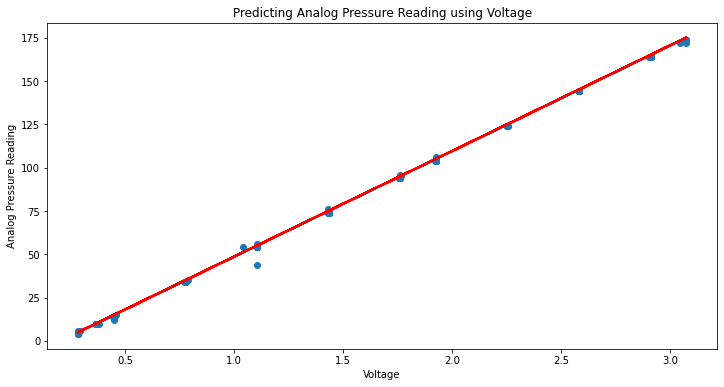

In [8]:
##Create and print model of analogue pressure as a function of voltage

model1 = smf.ols('pa_psia ~ pd_volts', data=dataset)
model1 = model1.fit()
print(model1.params)

anaPressure_pred = model1.predict()

plt.figure(figsize=(12, 6))
plt.plot(dataset['pd_volts'], dataset['pa_psia'], 'o')
plt.plot(dataset['pd_volts'], transPressure_pred, 'r', linewidth=2)
plt.xlabel('Voltage')
plt.ylabel('Analog Pressure Reading')
plt.title('Predicting Analog Pressure Reading using Voltage')

plt.show()

In [9]:
#using lab 18, speed time example, form a line fomrmula and ask user for input voltage to predict pressure


In [10]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr
from hydroeval import *

testId = np.array(dataset["test_id"])
trueP = np.array(dataset["pt_psia"])
anaP = np.array(dataset["pa_psia"])
volts = np.array(dataset["pd_volts"])

model_trueP = smf.ols('pt_psia ~ pd_volts', data=dataset)
model_trueP = model_trueP.fit()
trueP_pred = model_trueP.predict()


#Error testing for a linear regression model

print("RMSE for voltage as predictor for True Pressure is ",np.sqrt(metrics.mean_squared_error(trueP, trueP_pred)))
print("R2 for voltage as predictor for True Pressure is ",metrics.r2_score(trueP, trueP_pred))
trueP_r = pearsonr(trueP_pred, trueP)
print("Pearson's r for voltage as predictor for True Pressure is ",trueP_r[0])
trueP_nse = evaluator(nse, trueP_pred, trueP)
print("NSE for voltage as predictor for True Pressure ",trueP_nse)
trueP_kge = evaluator(kgeprime, trueP_pred, trueP)
print("KGE for voltage as predictor for True Pressure is ",trueP_kge)

RMSE for voltage as predictor for True Pressure is  0.4348920898366701
R2 for voltage as predictor for True Pressure is  0.9999441077775557
Pearson's r for voltage as predictor for True Pressure is  0.9999720534982746
NSE for voltage as predictor for True Pressure  [0.99994411]
KGE for voltage as predictor for True Pressure is  [[0.99996048]
 [0.99997205]
 [0.99997205]
 [1.        ]]
